In [4]:
from music21 import *
import os
import xml.etree.ElementTree as ET
import pandas as pd
from rich import print
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
mscore_path = '/usr/bin/mscore'
us = environment.UserSettings()
us['musicxmlPath'] = mscore_path
us['musescoreDirectPNGPath'] = mscore_path

In [6]:
# mscore_path = '/Applications/MuseScore 4.app/Contents/MacOS/mscore'
# us = environment.UserSettings()
# us['musicxmlPath'] = mscore_path
# us['musescoreDirectPNGPath'] = mscore_path

In [7]:
data_path = './SymbTr'
music_xml_path = os.path.join(data_path, 'MusicXML')
music_xml_nokeysig_path = os.path.join(data_path, 'MusicXML_NoKeySig')

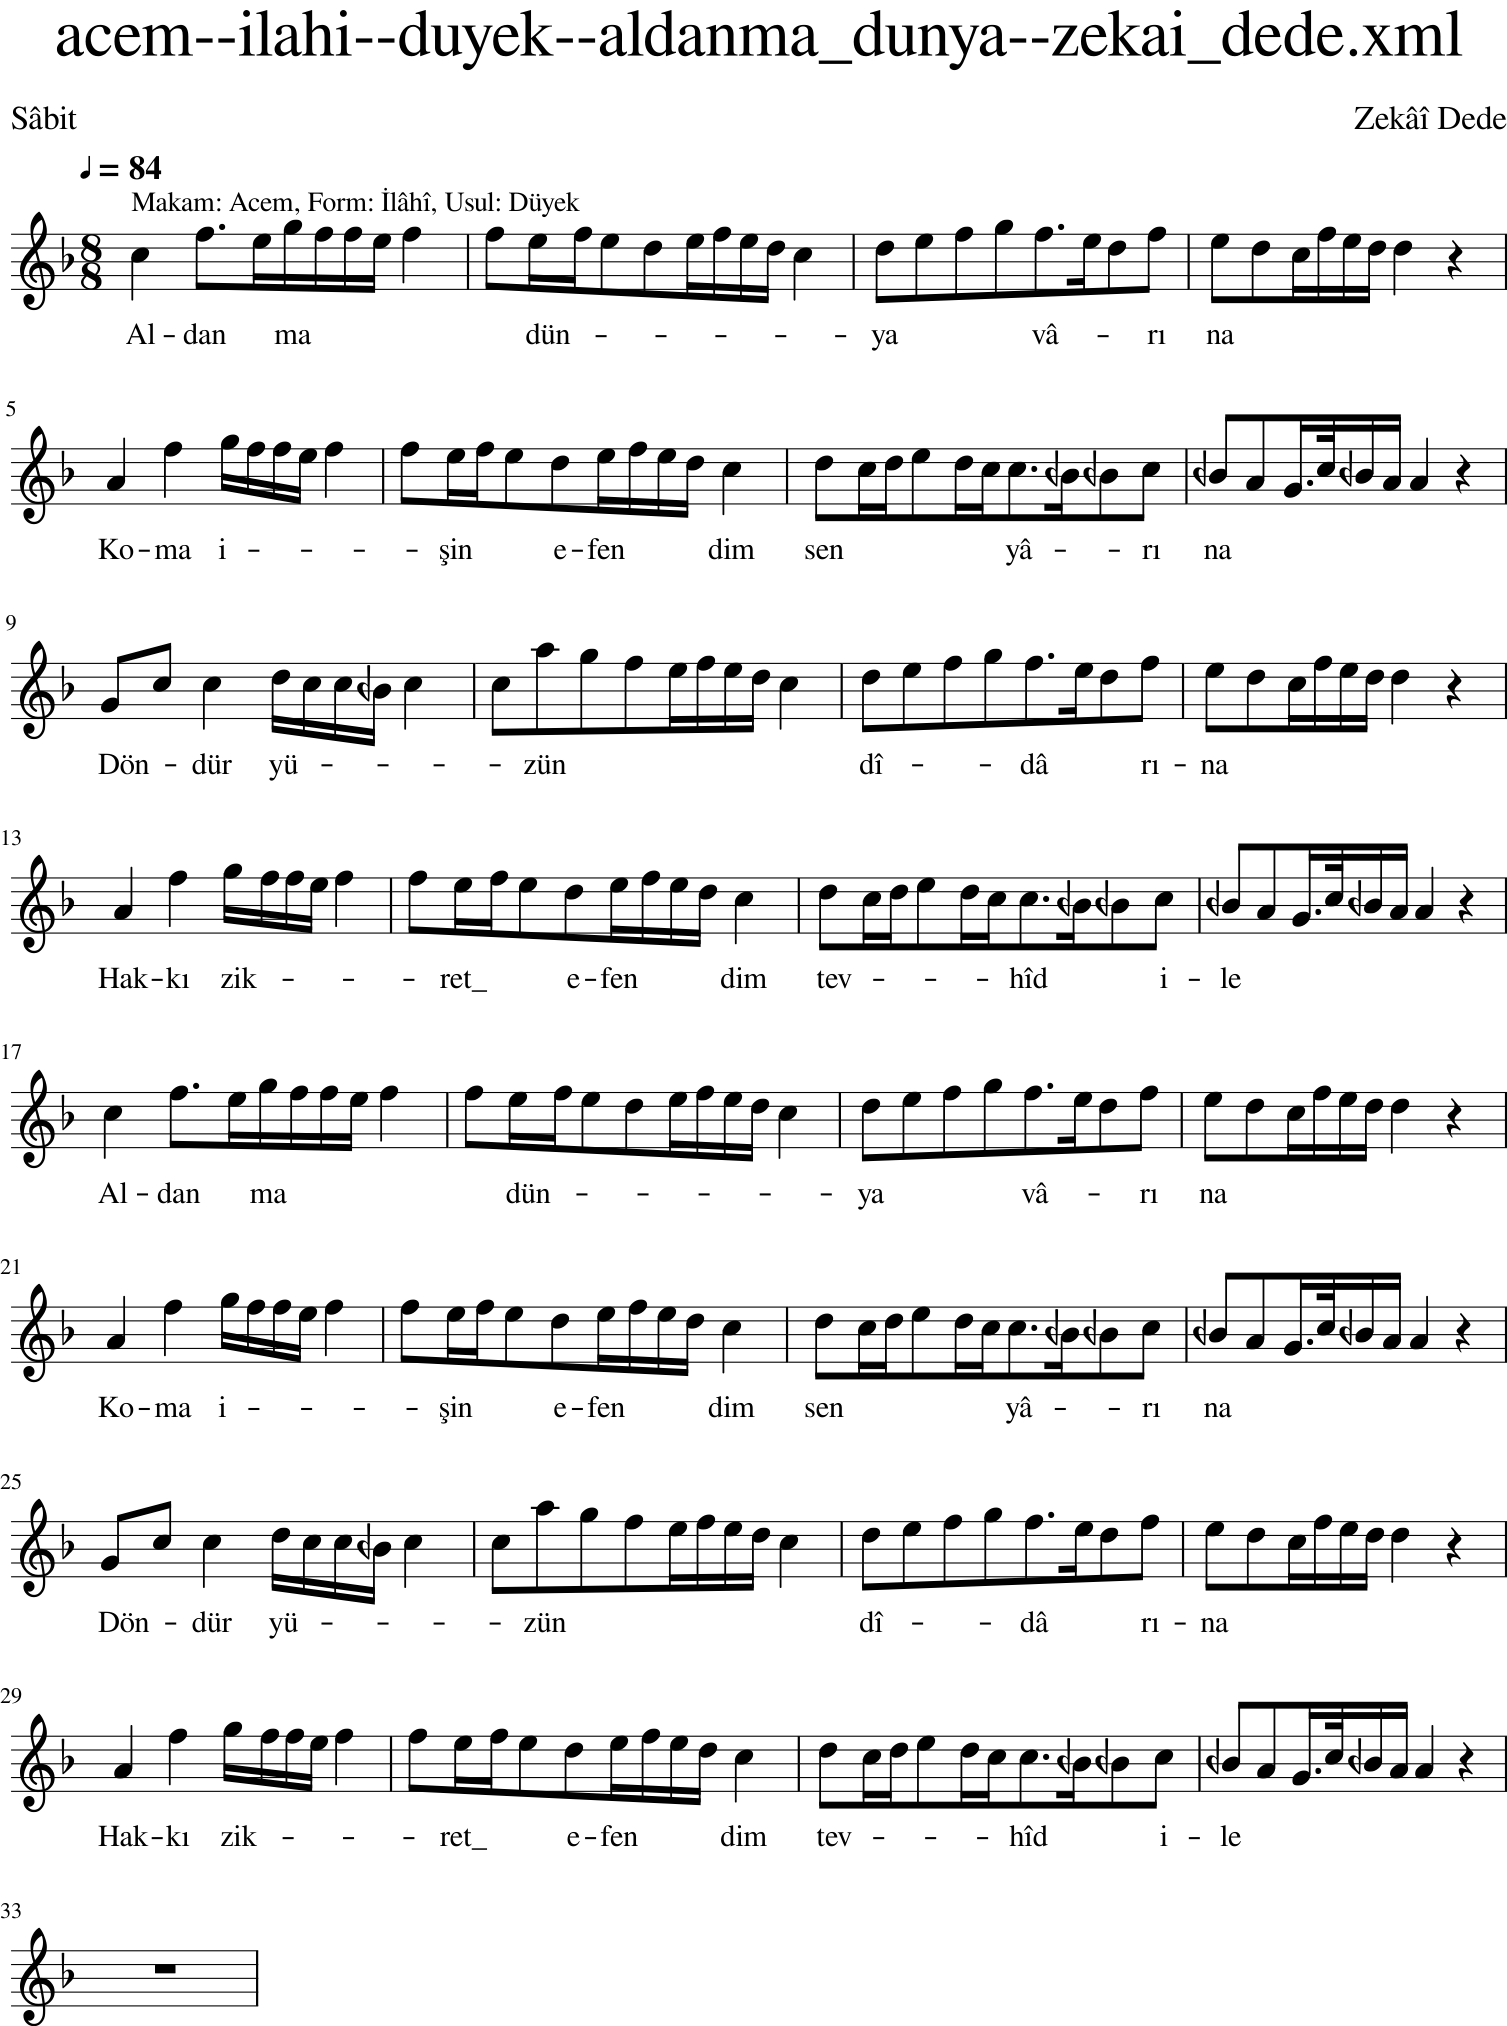

In [8]:
s = converter.parse(music_xml_path + '/acem--ilahi--duyek--aldanma_dunya--zekai_dede.xml')
s.show()

In [9]:
all_scores = os.listdir(music_xml_path)
label_map = {}
for score in all_scores:
    label = score.split('--')[2]
    if label not in label_map:
        label_map[label] = []
    label_map[label].append(score)

In [10]:
sorted_items = sorted(label_map.items(), key=lambda x: len(x[1]), reverse=True)
print(list(zip(label_map.keys(), [len(value) for value in label_map.values()])))

[
    ('nimsofyan', 99),
    ('curcuna', 111),
    ('agiraksak', 108),
    ('agirduyek', 15),
    ('durakevferi', 3),
    ('duyek', 278),
    ('hafif', 19),
    ('sofyan', 293),
    ('senginsemai', 72),
    ('aksak', 319),
    ('sarkidevrirevani', 5),
    ('kapali_curcuna', 49),
    ('yuruksemai', 62),
    ('fahte', 9),
    ('devrirevanihindi', 25),
    ('semai', 100),
    ('turkaksagi', 64),
    ('muhammes', 22),
    ('agirevfer', 13),
    ('evfer', 20),
    ('yuruksemai_ii', 55),
    ('musemmen', 38),
    ('devrihindi_ii', 2),
    ('devrisureyyasofyani', 1),
    ('aksaksemai', 128),
    ('devrikebir', 33),
    ('devrihindi', 58),
    ('agir_aksaksemai', 13),
    ('raksaksagi', 12),
    ('nimdevir', 2),
    ('iki_bir', 2),
    ('ciftesofyan', 14),
    ('bektasidevrirevani', 2),
    ('aydin', 9),
    ('devrituran', 10),
    ('darb', 5),
    ('nimsakil', 1),
    ('raksan', 2),
    ('cifteduyek', 6),
    ('devrituran_ii', 1),
    ('oynak', 11),
    ('agircenber', 7),
    ('cengiharbi', 1),
    ('evsat', 5),
    ('devrisureyya', 1),
    ('tekvurus', 1),
    ('yuruksofyan', 1),
    ('lenkfahte', 3),
    ('darbifetih', 5),
    ('nimevsat', 2),
    ('musemmen_ii', 8),
    ('bektasiraksi', 1),
    ('nimberefsan', 1),
    ('devrirevan', 3),
    ('iraksak', 1),
    ('turkdarbi', 1),
    ('ferimuhammes', 1),
    ('turkmen', 1),
    ('cenber', 9),
    ('berefsan', 3),
    ('ikizaksak', 3),
    ('sakil', 2),
    ('aksaksemaievferi', 2),
    ('agirsenginsemai', 3),
    ('azeriyuruksemai', 6),
    ('fer', 1),
    ('murekkepsofyan', 2),
    ('firengifer', 1),
    ('devriaryan', 1),
    ('zencir', 8),
    ('remel', 2),
    ('dolap', 2),
    ('3334', 1),
    ('katikofti', 1),
    ('ayindevrirevani', 1),
    ('havi', 2),
    ('serbest', 2),
    ('14_4', 1),
    ('nimhafif', 2),
    ('mevlevievferi', 2),
    ('muasser', 1),
    ('bektasiraksani', 1),
    ('frenkcin', 2),
    ('darbeyn', 1),
    ('raksaksagi_ii', 1),
    ('bulgardarbi', 1),
    ('murekkepnimsofyan', 1),
    ('223', 1)
]

In [11]:
if not os.path.exists(music_xml_nokeysig_path):
    beatsDic = {}

    # Create a folder to contain the xml scores without key signature
    os.mkdir(music_xml_nokeysig_path)

    for score in all_scores:
        # print(all_scores.index(score)+1, '- Processing', score)
        
        # Remove the key signature from the xml file
        tree = ET.parse(os.path.join(music_xml_path, score))
        root = tree.getroot()
        
        for att in root.iter('attributes'):
            if att.find('key'):
                att.remove(att.find('key'))
        
        # Save the new xml files to be later loaded with music21
        new_score = os.path.join(music_xml_nokeysig_path, score)
        tree.write(new_score)
        
        # Load the file in music21 and get a stream with all the notes
        s = converter.parse(new_score)
        nn = s.flatten().notes.stream()
        
        # Count the notes per beat
        for n in nn:
            beatsDic[n.beat] = beatsDic.get(n.beat, 0) + 1 # Use the .beat attibute

    print('\nDone!')
else:
    print(f'The folder {music_xml_nokeysig_path} already exists. Skipping the process.')

The folder ./SymbTr/MusicXML_NoKeySig already exists. Skipping the process.

In [12]:
all_new_scores = os.listdir(music_xml_nokeysig_path)
new_label_map = {}
for score in all_new_scores:
    label = score.split('--')[2]
    if label not in new_label_map:
        new_label_map[label] = []
    new_label_map[label].append(score)

In [13]:
# new_sorted_items = sorted(new_label_map.items(), key=lambda x: len(x[1]), reverse=True)
# for key, value in new_sorted_items:
#   time_sigs = set()
#   for score in value:
#     s = converter.parse(music_xml_nokeysig_path + '/' + score)
#     time_signature = s.getTimeSignatures()[0].ratioString
#     time_sigs.add(time_signature)
#   print(key, len(value), time_sigs)

In [14]:
blacklist = [
    'beyati--sarki--duyek--ruhuma_sundugun--sadettin_kaynak.xml',
    'saba--miraciye--serbest--pes_heman--nayi_osman_dede.xml',
]

df_columns = [
    'path',
    'makam_file',
    'form_file',
    'usul_file',
    'lyrics_file',
    'composer_file',
    'composer',
    'poet',
    'work_title',
    'bar_count',
    'music',
]
df = pd.DataFrame(columns=df_columns)

all_scores = os.listdir(music_xml_nokeysig_path)
for score in all_scores:
    if score in blacklist: continue
    
    R_path = os.path.join(music_xml_nokeysig_path, score)

    # Data in the filename
    filename_data = score.split(".xml")[0].split("--")
    R_makam_file = filename_data[0]
    R_form_file = filename_data[1]
    R_usul_file = filename_data[2]
    R_lyrics_file = filename_data[3]
    R_composer_file = filename_data[4]

    # Load the file in music21
    s = converter.parse(R_path)

    # Metadata data
    m = s.metadata
    p = s.parts[0]
    measures = p.getElementsByClass(stream.Measure)
    R_composer = m.getContributorsByRole("composer")[0].name
    R_poet = m.getContributorsByRole("poet")[0].name if m.getContributorsByRole("poet") else None
    R_work_title = m.title
    R_bar_count = len(measures)
    R_music = []

    last_makam = None
    last_form = None
    last_usul = None
    last_tempo = None


    try:
        for m in measures:
            text_expressions = m.getElementsByClass('TextExpression')
            if text_expressions:
                te = text_expressions[0]
                keys = []
                values = []
                for item in te.content.split(','):
                    key, value = item.split(': ')
                    keys.append(key)
                    values.append(value)
                expr = {k.strip(): v.strip() for k, v in zip(keys, values)}
                if expr.get('Makam'): last_makam = expr['Makam']
                if expr.get('Form'): last_form = expr['Form']
                if expr.get('Usul'): last_usul = expr['Usul']

            tempo = m.getElementsByClass('MetronomeMark')
            if tempo:
                t = tempo[0]
                last_tempo = t.number

            time_signature = m.getTimeSignatures()[0]
            R_mi = {
                "time_signature": time_signature.ratioString,
                "makam": last_makam,
                "tempo": last_tempo,
                "usul": last_usul,
                "form": last_form,
                "notes": [],
                "beat_data": [0] * time_signature.numerator,
            }
            beat_n = 0
            duration_sum = 0

            for n in m.notes:
                if n.duration.isGrace: continue
                if n.isNote:
                    R_mi["beat_data"][beat_n] += 1
                duration = n.duration.quarterLength
                duration_sum += duration
                beat_n = math.floor(duration_sum * 96 / (384 / time_signature.denominator)) # TODO: do not hardcode

                R_mi["notes"].append({
                    "step": n.step,
                    "octave": n.octave,
                    # "lyric": n.lyric if n.lyric else None,
                    "duration": duration,
                })
            
            R_music.append(R_mi)
    except Exception as e:
        print(f'Error processing {R_path}: {e}')
        continue

    # Create a dictionary with the results
    new_row = {
        'path': R_path,
        'makam_file': R_makam_file,
        'form_file': R_form_file,
        'usul_file': R_usul_file,
        'lyrics_file': R_lyrics_file,
        'composer_file': R_composer_file,
        'composer': R_composer,
        'poet': R_poet,
        'work_title': R_work_title,
        'bar_count': R_bar_count,
        'music': R_music,
    }

    # Append the new row to the dataframe
    df = pd.concat([df, pd.DataFrame([new_row], columns=df_columns)], ignore_index=True)

In [15]:
df.head()

,path,makam_file,form_file,usul_file,lyrics_file,composer_file,composer,poet,work_title,bar_count,music
0,./SymbTr/MusicXML_NoKeySig/hicaz--sarki--nimso...,hicaz,sarki,nimsofyan,yar_saclari,yesari_asim_arsoy,Yesârî Âsım Arsoy,Yesârî Âsım Arsoy,Yâr Saçları Lüle Lüle,145,"[{'time_signature': '2/4', 'makam': 'Hicaz', '..."
1,./SymbTr/MusicXML_NoKeySig/muhayyerkurdi--sark...,muhayyerkurdi,sarki,curcuna,bakisi_cagirir,selahaddin_pinar,Selahaddin Pınar,Fuad Edip Baksı,Bakışı Çağırır Beni Uzaktan,82,"[{'time_signature': '10/8', 'makam': 'Muhayyer..."
2,./SymbTr/MusicXML_NoKeySig/nihavent--sarki--ag...,nihavent,sarki,agiraksak,akibet_viran,numan_aga,Numan Ağa,?,Akıbet Viran,32,"[{'time_signature': '9/4', 'makam': 'Nihâvent'..."
3,./SymbTr/MusicXML_NoKeySig/hicaz--beste--agird...,hicaz,beste,agirduyek,ey_cesm-i,dede_efendi,Dede Efendi,Kadı Mehmet Riyâzî,Ey Çeşm-I Âhû,53,"[{'time_signature': '8/4', 'makam': 'Hicaz', '..."
4,./SymbTr/MusicXML_NoKeySig/ussak--sarki--curcu...,ussak,sarki,curcuna,hastasin_zannim,sevki_bey,Şevki Bey,Mehmed Hafîd Bey,Hastasın Zannım Vefâ Mahzunusun,56,"[{'time_signature': '10/8', 'makam': 'Uşşak', ..."


In [16]:
VALID_USULS_FILENAME = ['aksak', 'curcuna', 'duyek', 'semai', 'sofyan', 'turkaksagi']
VALID_USULS_SHEET = [
    "Düyek (16/8)",
    "Sofyan (4/8)",
    "Türkaksağı (5/4)",
    "Türkaksağı",
    "Aksak (9/4)",
    "Semâî (3/8)",
    "Düyek (8/4)",
    "Semâî",
    "Düyek",
    "Curcuna",
    "Sofyan",
    "Aksak",
]

df_filtered = df[df['usul_file'].isin(VALID_USULS_FILENAME)]
beat_data_overview = []
for i, row in df_filtered.iterrows():
    music = row['music']

    beat_data_summary = {}
    for m in music:
        usul = m['usul']
        if usul not in VALID_USULS_SHEET: continue
        if usul not in beat_data_summary:
            beat_data_summary[usul] = {
                'full_beat_data': m['beat_data'],
                'measure_count': 1,
                'mean_diff': None,
            }
        else:
            beat_data_summary[usul]['full_beat_data'] = list(np.add(beat_data_summary[usul]['full_beat_data'], m['beat_data']))
            beat_data_summary[usul]['measure_count'] += 1
    
    for usul, beat_data_sum in beat_data_summary.items():
        beat_data_summary[usul]['mean_diff'] = list(np.array(beat_data_sum['full_beat_data']) / beat_data_sum['measure_count'])
        beat_data_summary[usul]['norm_mean_diff'] = list(np.array(beat_data_sum['mean_diff']) / max(beat_data_sum['mean_diff']))
    
    beat_data_overview.append({
        'id': i,
        'path': row['path'],
        'summary': beat_data_summary,
    })

./SymbTr/MusicXML_NoKeySig/muhayyerkurdi--sarki--curcuna--bakisi_cagirir--selahaddin_pinar.xml

Curcuna

[56, 36, 38, 56, 38, 50, 54, 60, 10, 14]

[
    0.9824561403508771,
    0.631578947368421,
    0.6666666666666666,
    0.9824561403508771,
    0.6666666666666666,
    0.8771929824561403,
    0.9473684210526315,
    1.0526315789473684,
    0.17543859649122806,
    0.24561403508771928
]

[
    0.9333333333333333,
    0.6,
    0.6333333333333333,
    0.9333333333333333,
    0.6333333333333333,
    0.8333333333333334,
    0.9,
    1.0,
    0.16666666666666666,
    0.23333333333333334
]

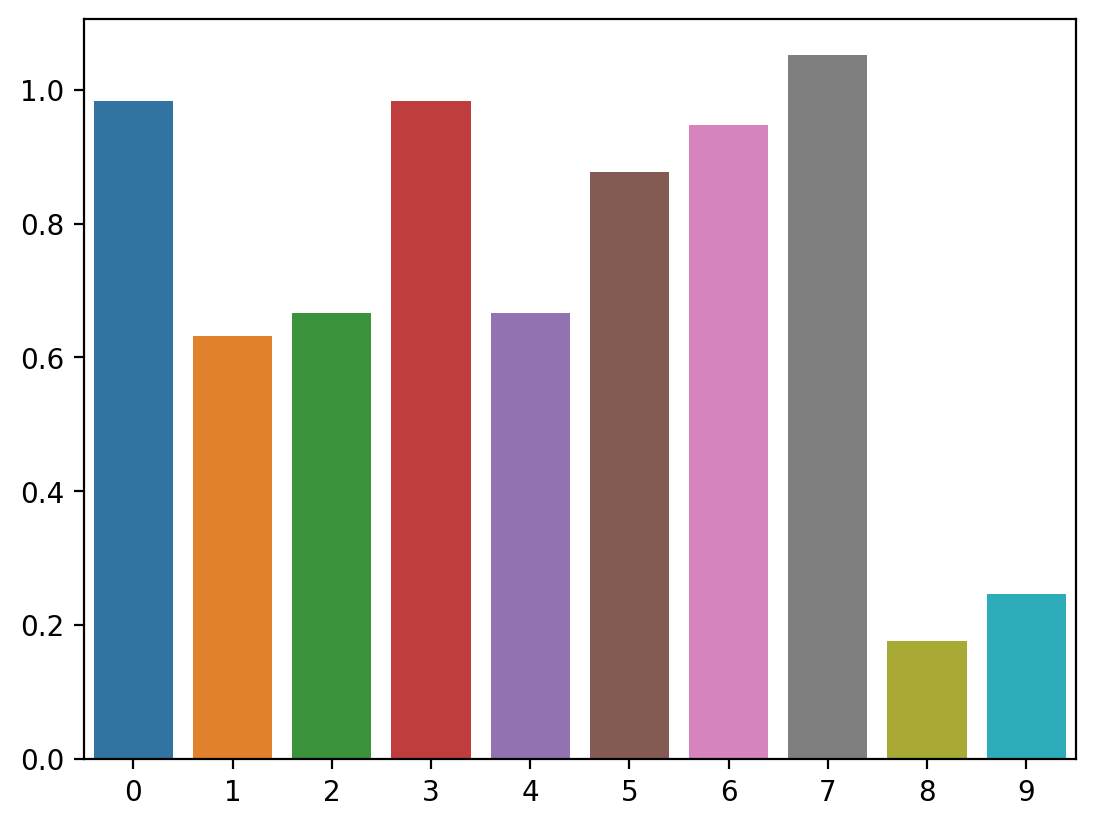

Aksak

[26, 16, 18, 20, 29, 34, 27, 17, 19]

[1.04, 0.64, 0.72, 0.8, 1.16, 1.36, 1.08, 0.68, 0.76]

[
    0.7647058823529411,
    0.47058823529411764,
    0.5294117647058822,
    0.5882352941176471,
    0.8529411764705881,
    1.0,
    0.7941176470588235,
    0.5,
    0.5588235294117647
]

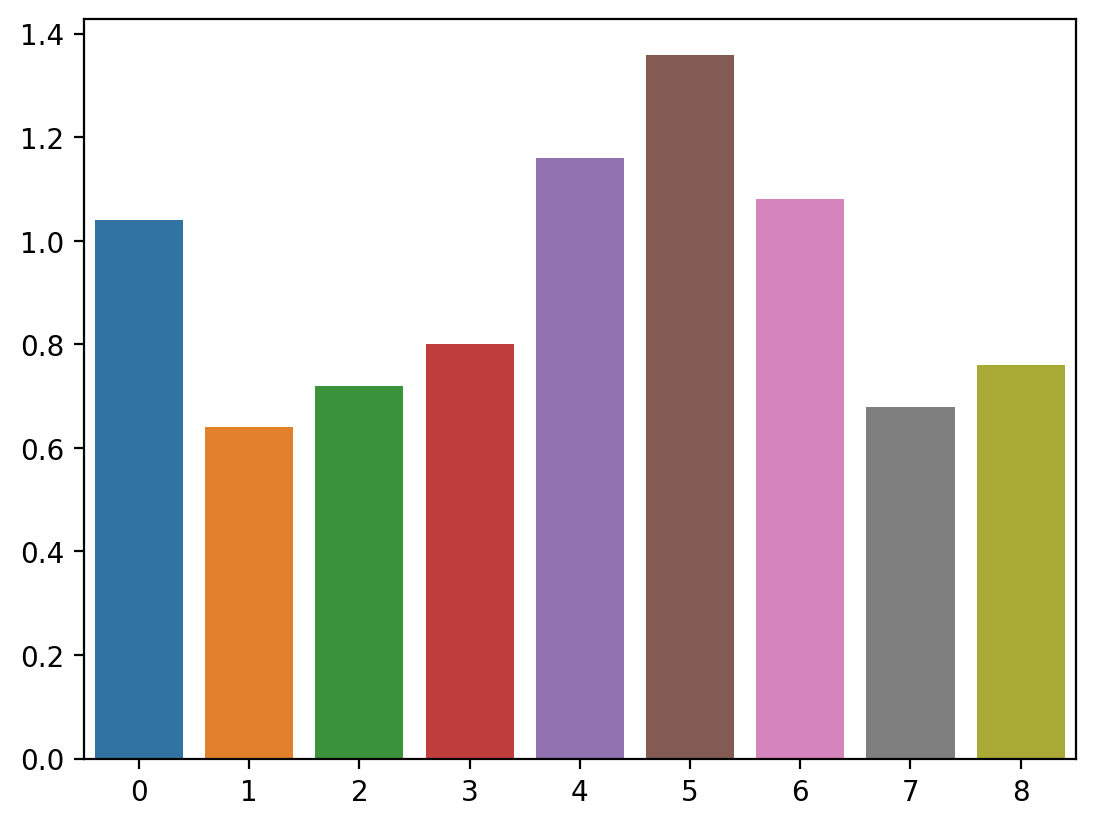

In [17]:
item = beat_data_overview[0]
print(item['path'])
for usul, beat_data_sum in item['summary'].items():
    print(usul)
    print(beat_data_sum['full_beat_data'])
    print(beat_data_sum['mean_diff'])
    print(beat_data_sum['norm_mean_diff'])

    mean_diff = beat_data_sum['mean_diff']
    n = len(mean_diff)

    plt.figure()
    sns.barplot(x=np.arange(n), y=mean_diff)
    plt.show()

In [18]:
usul_beat_overview = {}
for item in beat_data_overview:
    for usul, beat_data_sum in item['summary'].items():
        if usul not in usul_beat_overview:
            usul_beat_overview[usul] = {
                'norm_sum': beat_data_sum['norm_mean_diff'],
                'count': 1,
            }
        else:
            usul_beat_overview[usul]['norm_sum'] = list(np.add(usul_beat_overview[usul]['norm_sum'], beat_data_sum['norm_mean_diff']))
            usul_beat_overview[usul]['count'] += 1

for usul, beat_overview in usul_beat_overview.items():
    usul_beat_overview[usul]['norm_mean'] = list(np.array(beat_overview['norm_sum']) / beat_overview['count'])
    usul_beat_overview[usul]['norm_mean'] = list(np.array(usul_beat_overview[usul]['norm_mean']) / max(usul_beat_overview[usul]['norm_mean']))

Curcuna

116

[
    1.0,
    0.42659443604958086,
    0.7328697767040687,
    0.8277042525804967,
    0.579040152669694,
    0.9674477389544323,
    0.6828145115105734,
    0.8715696842700164,
    0.2867485908955803,
    0.45757838836450443
]

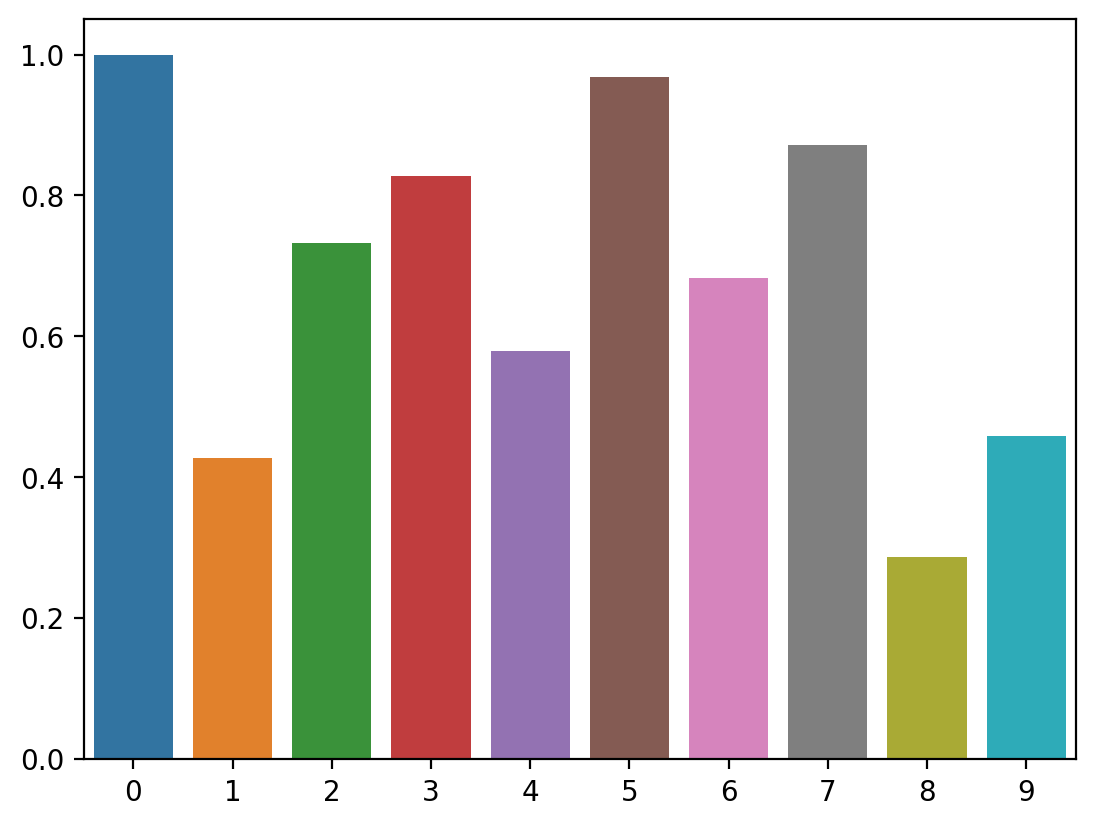

Aksak

306

[
    0.990208389196017,
    0.6785238056939072,
    0.8216396463434963,
    0.9208660823024929,
    1.0,
    0.8464880905547709,
    0.9037536113274429,
    0.5595552834644012,
    0.6619250320333396
]

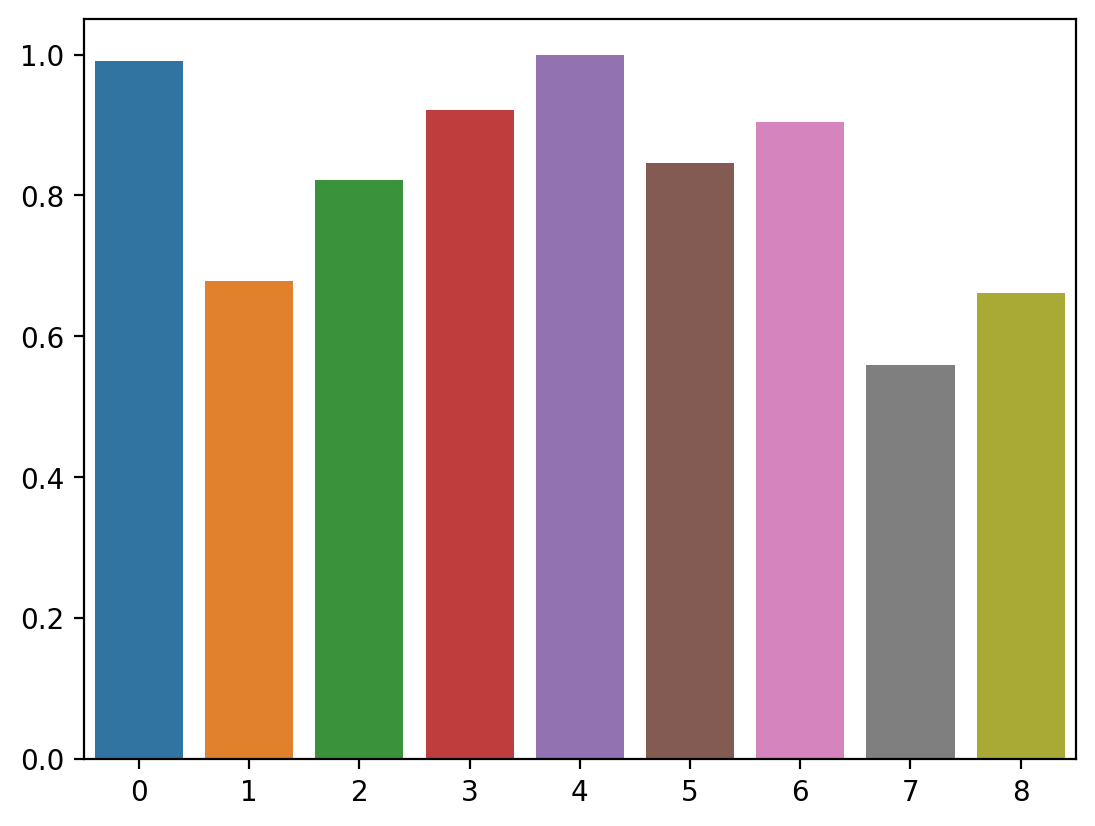

Düyek

250

[
    1.0,
    0.7166126237453214,
    0.6684386731193412,
    0.9040788074996168,
    0.9325131464105397,
    0.800093413910361,
    0.7048378176959172,
    0.3352383564027157
]

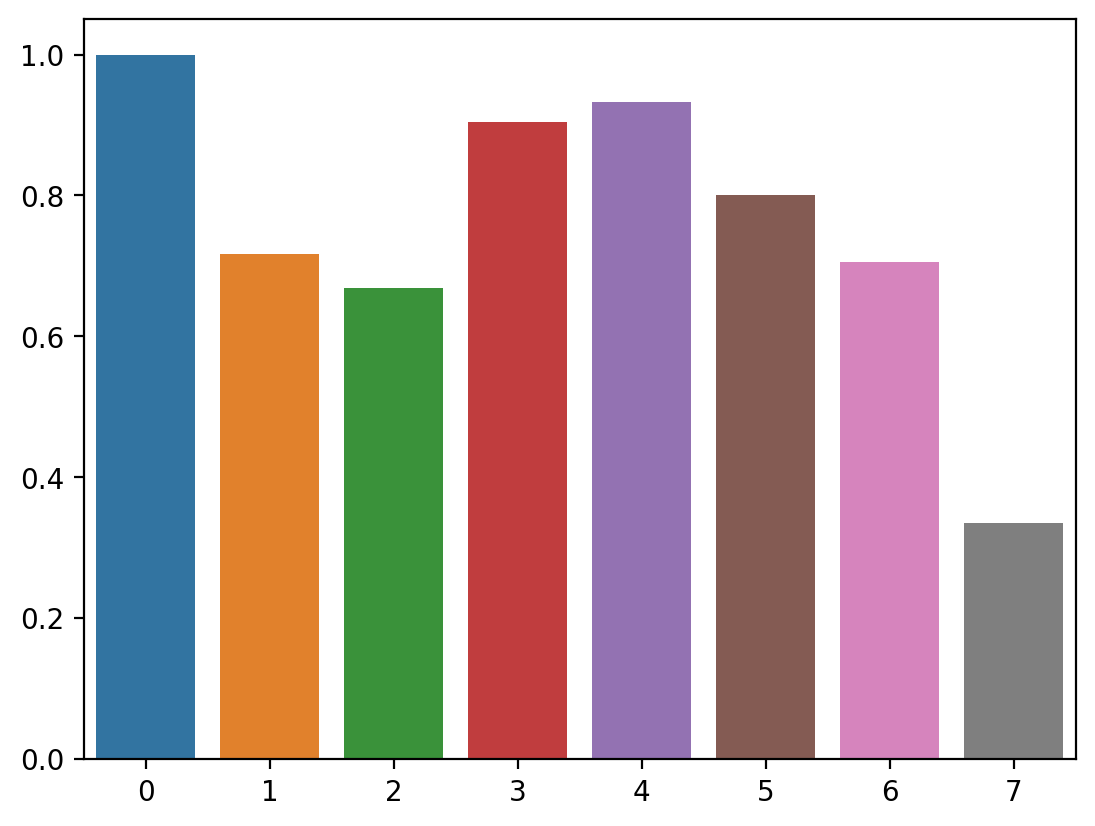

Sofyan

292

[1.0, 0.994460231932091, 0.9026641930885912, 0.6074067694009848]

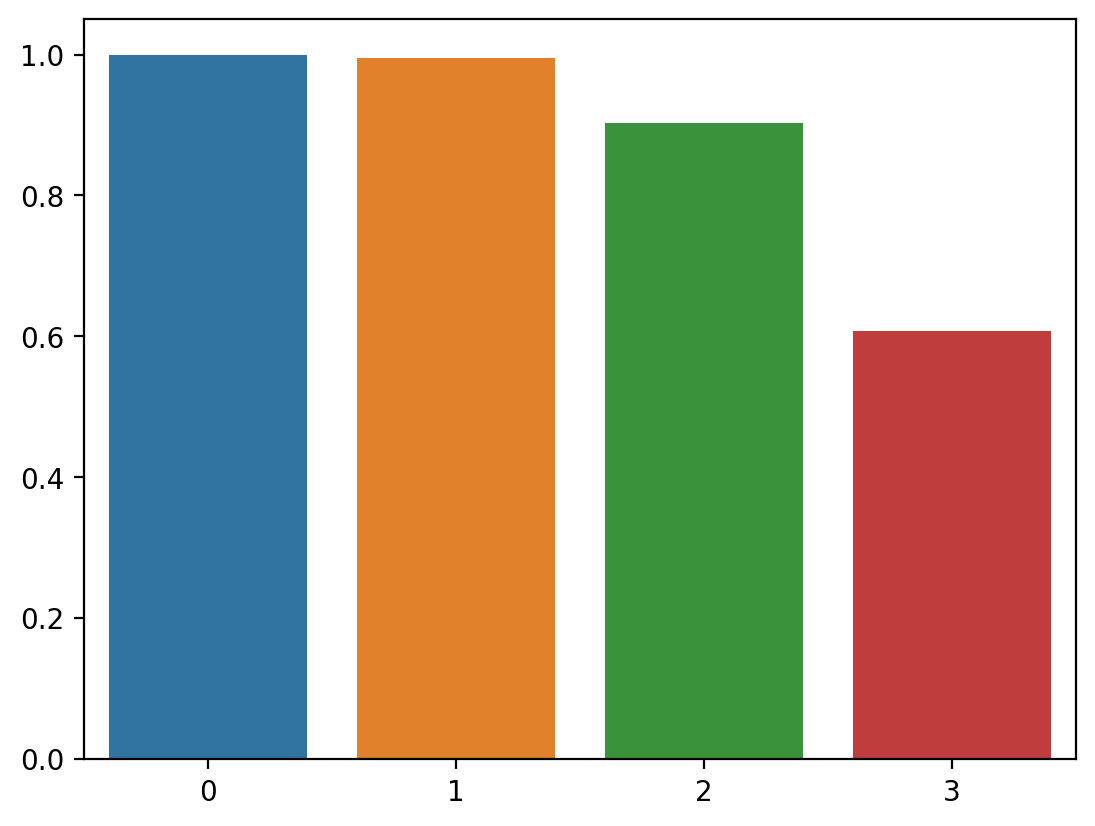

Semâî

101

[1.0, 0.5704687142948641, 0.6749386811418531]

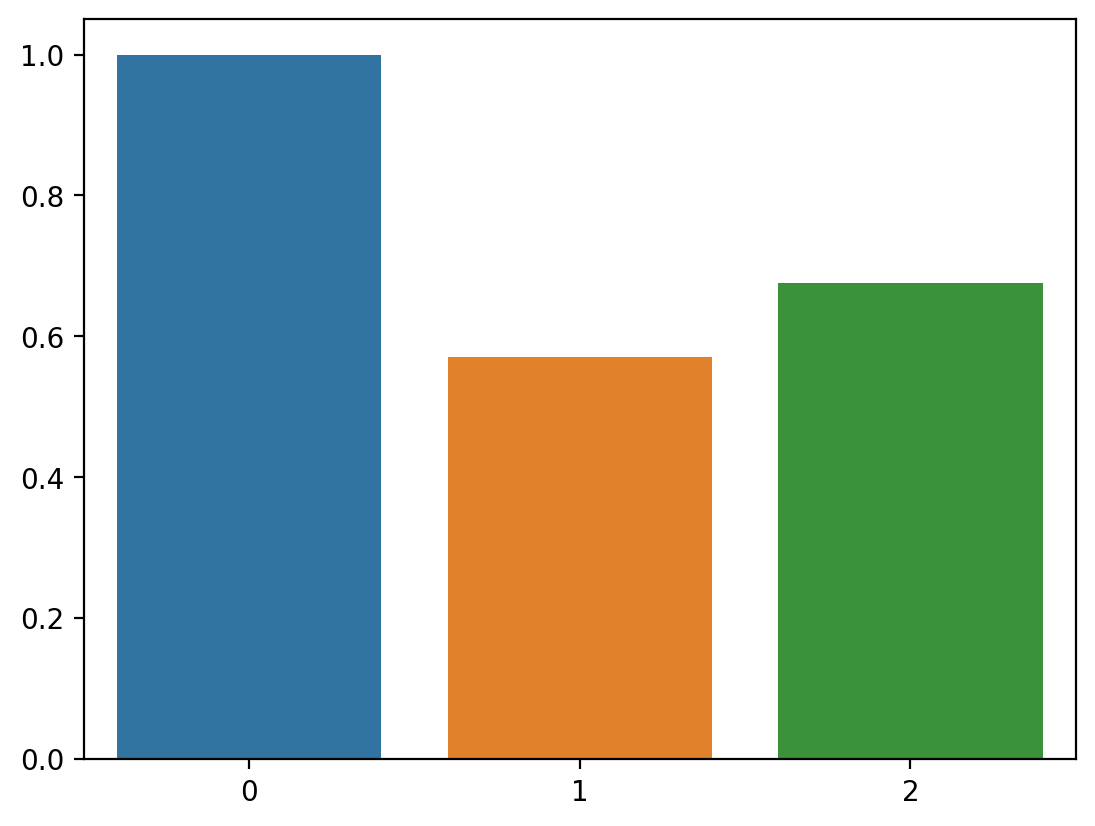

Türkaksağı

62

[1.0, 0.8702929582686275, 0.9206850379297349, 0.5586442209419746, 0.669153734537866]

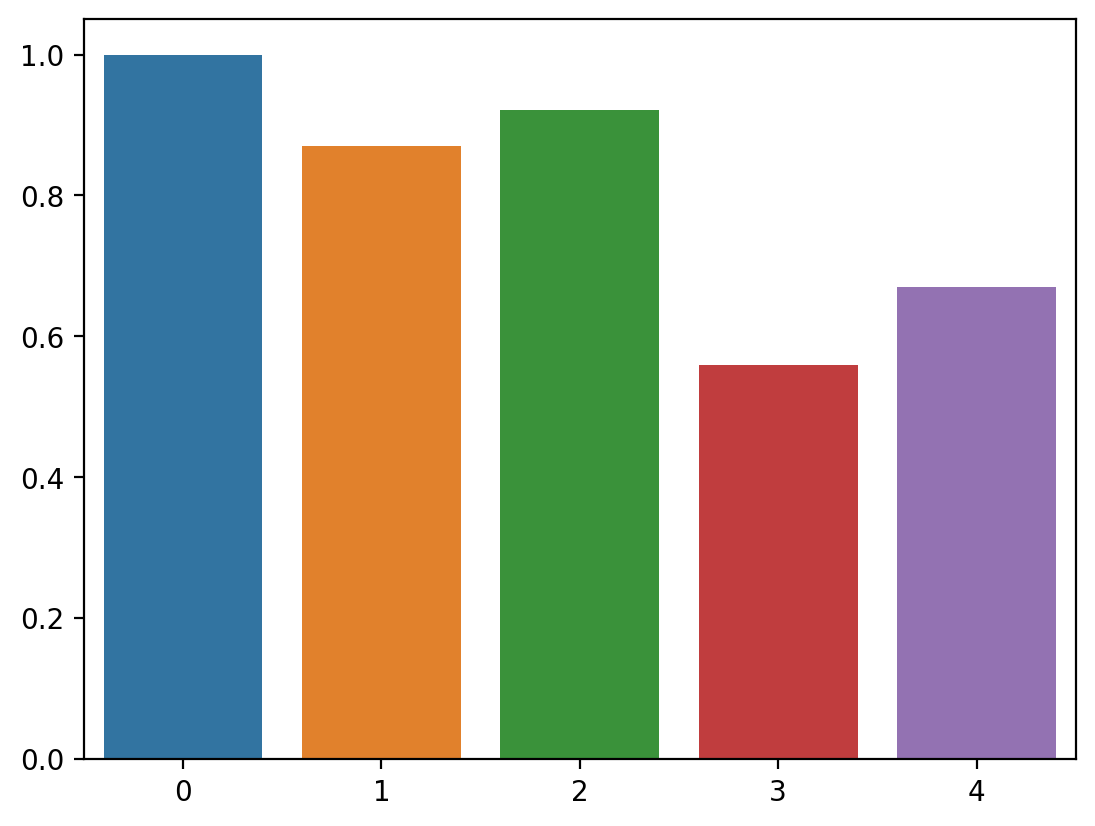

Düyek (8/4)

31

[
    0.7419285272950377,
    0.6385041154679237,
    0.6173997849690759,
    0.8345661514228068,
    0.9432637526356269,
    1.0,
    0.7689489980243668,
    0.2011533315832362
]

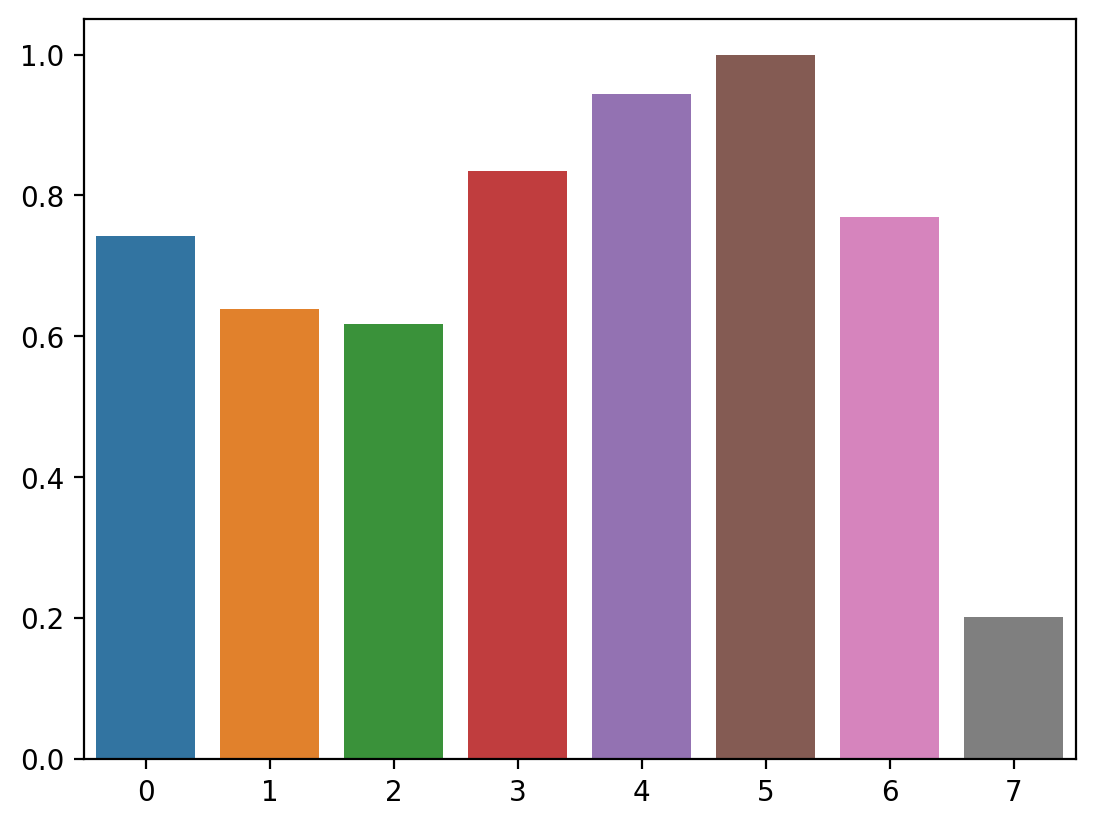

Aksak (9/4)

16

[
    0.7258158192106051,
    0.6340676052175989,
    0.7481754624407638,
    1.0,
    0.8144199486451845,
    0.8656242238103466,
    0.7185681182543182,
    0.583217891305251,
    0.35977368261805737
]

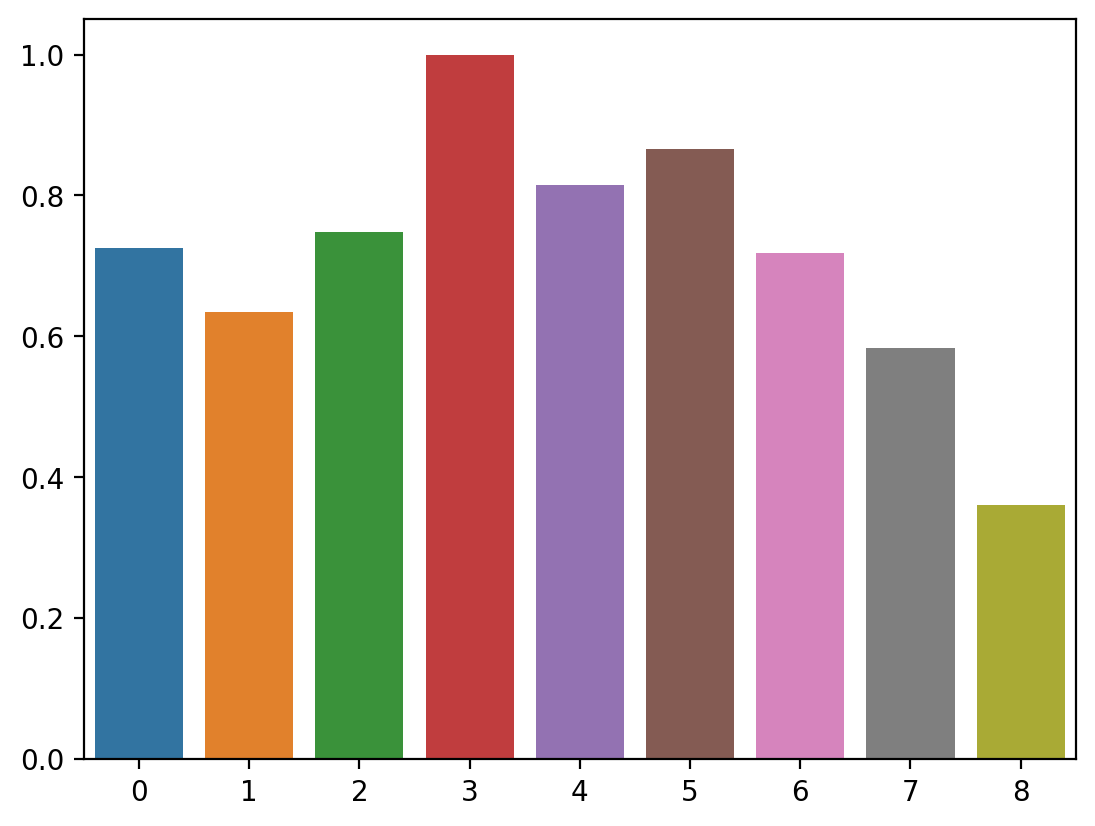

Semâî (3/8)

3

[1.0, 0.4650352913230853, 0.6486010723132783]

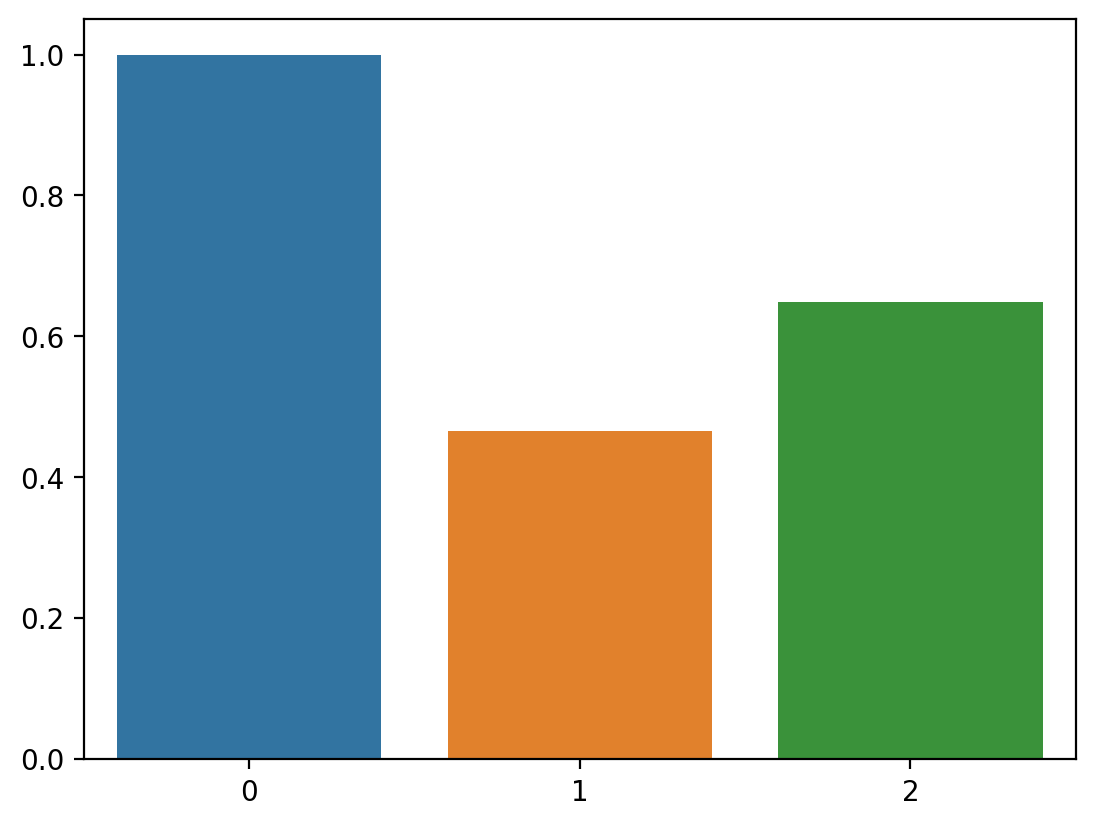

Sofyan (4/8)

5

[1.0, 0.32516339869281047, 0.6062418300653596, 0.6146078431372548]

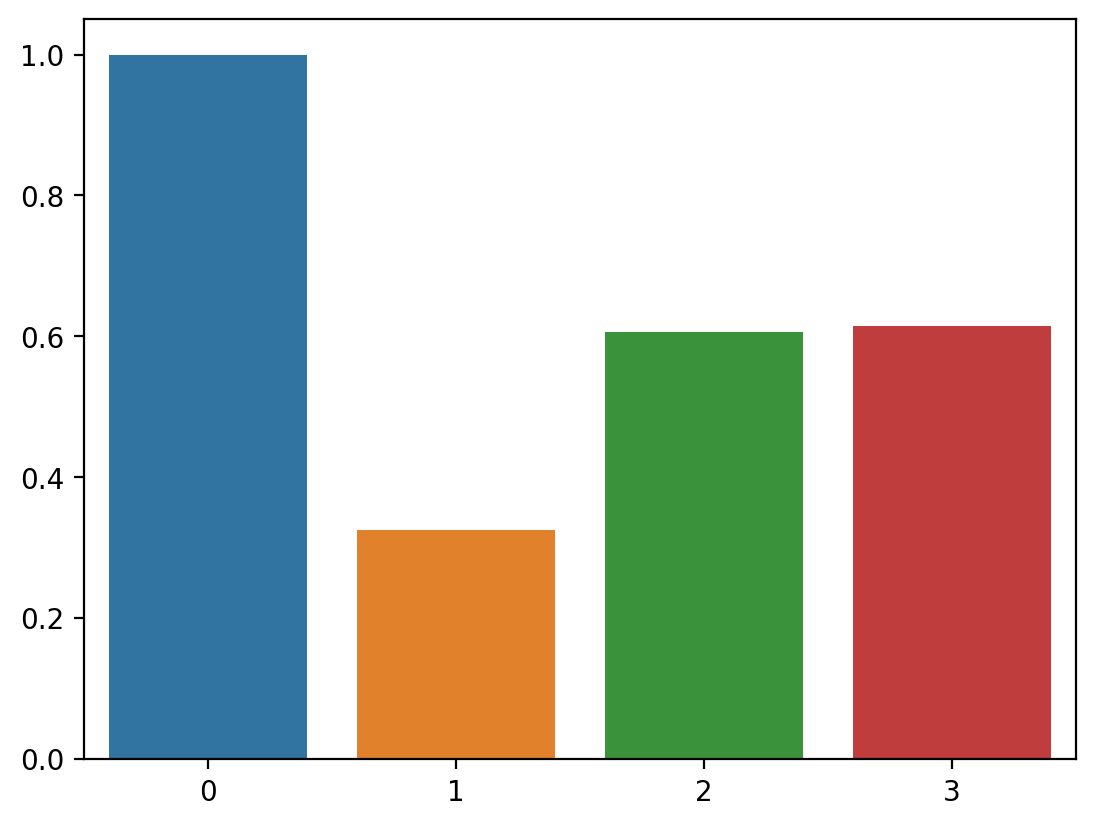

Türkaksağı (5/4)

3

[1.0, 0.7566051275360428, 0.998352795355209, 0.9654576293300279, 0.5757877226172614]

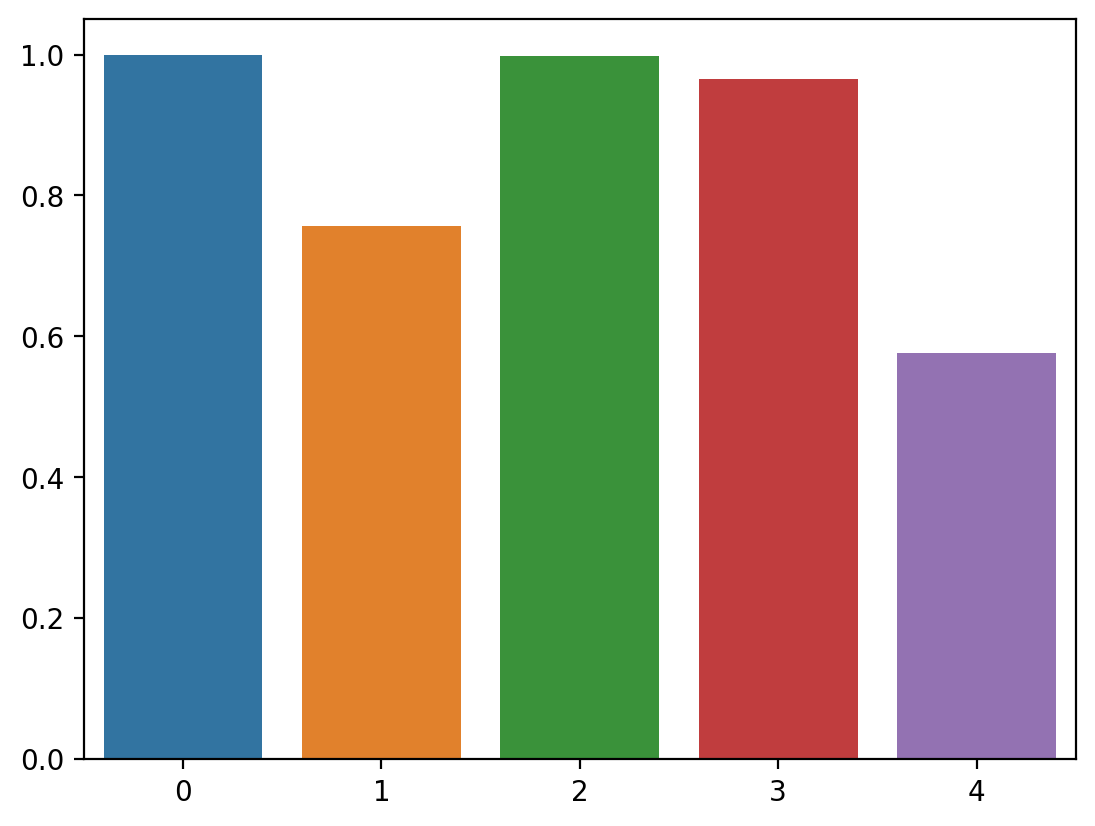

Düyek (16/8)

1

[
    0.65,
    0.25,
    0.39999999999999997,
    0.5,
    1.0,
    0.6,
    0.5,
    0.5,
    0.35,
    0.7999999999999999,
    0.6,
    0.35,
    0.049999999999999996,
    0.7999999999999999,
    0.75,
    0.45
]

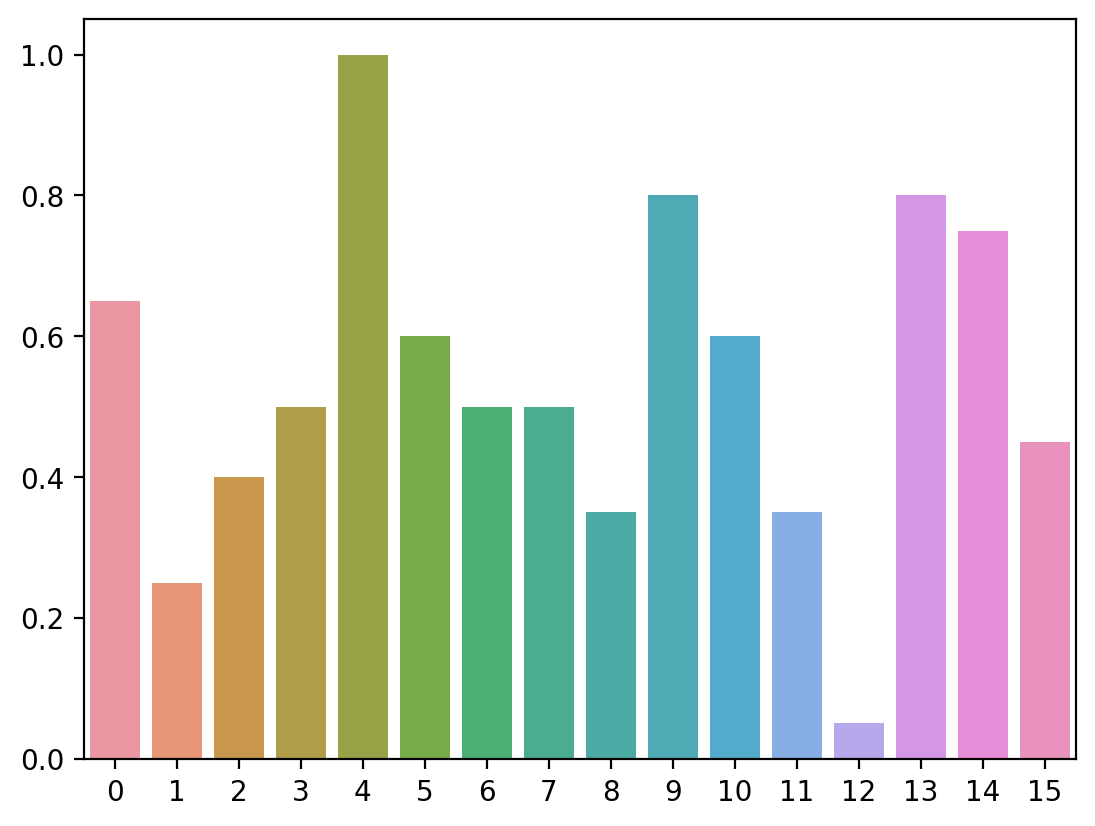

In [19]:
for usul, beat_overview in usul_beat_overview.items():
    print(usul)
    print(beat_overview['count'])
    print(beat_overview['norm_mean'])

    mean_diff = beat_overview['norm_mean']
    n = len(mean_diff)

    plt.figure()
    sns.barplot(x=np.arange(n), y=mean_diff)
    plt.show()

In [20]:
# plot a bar chart with the following information: x axis, 18 values, y axis (3,0,2,1,3,0,2,0,1)
sns.barplot(x=np.arange(18), y=[3,0,2,1,3,0,2,0,1])
plt.show()

ValueError: Grouper and axis must be same length